In [1]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

import acquire as a
import prepare as p
import model 

In [2]:
#set default
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('ggplot')

# Plan

I will check each file and select which city, state or country I will work in my project

In [3]:
city_df= pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [4]:
city_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [5]:
country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [6]:
country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [7]:
major = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [8]:
major.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [9]:
state = pd.read_csv('GlobalLandTemperaturesByState.csv')

In [10]:
state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [11]:
glob = pd.read_csv ('GlobalTemperatures.csv')

In [12]:
glob.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
glob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [14]:
city_df [city_df.City == 'San Antonio']

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
6618616,1820-01-01,7.169,3.676,San Antonio,United States,29.74N,97.85W
6618617,1820-02-01,11.448,2.964,San Antonio,United States,29.74N,97.85W
6618618,1820-03-01,15.003,2.413,San Antonio,United States,29.74N,97.85W
6618619,1820-04-01,21.022,2.136,San Antonio,United States,29.74N,97.85W
6618620,1820-05-01,23.938,1.923,San Antonio,United States,29.74N,97.85W
...,...,...,...,...,...,...,...
6620936,2013-05-01,23.617,0.217,San Antonio,United States,29.74N,97.85W
6620937,2013-06-01,28.652,0.537,San Antonio,United States,29.74N,97.85W
6620938,2013-07-01,28.946,0.329,San Antonio,United States,29.74N,97.85W
6620939,2013-08-01,29.937,0.416,San Antonio,United States,29.74N,97.85W


**takeaways**

- I will Select San Antonio , USA 
- I need to checl latitude and longitud to make sure is the same city


# Acquire

In [15]:
#get only for San Antonio ( I select latitude , longitude to get just san antonio tx)
df = city_df [(city_df.Latitude == '29.74N') & (city_df.Longitude == '97.85W') & (city_df.City == 'San Antonio')]

In [16]:
#checking that I got only San Antonio
df.City.value_counts()

San Antonio    2325
Name: City, dtype: int64

In [19]:
#check if it is the city in same country
df.Country.value_counts()

United States    2325
Name: Country, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 6618616 to 6620940
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2325 non-null   object 
 1   AverageTemperature             2316 non-null   float64
 2   AverageTemperatureUncertainty  2316 non-null   float64
 3   City                           2325 non-null   object 
 4   Country                        2325 non-null   object 
 5   Latitude                       2325 non-null   object 
 6   Longitude                      2325 non-null   object 
dtypes: float64(2), object(5)
memory usage: 145.3+ KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,2316.0,19.980095,6.870505,4.023,13.74825,20.3055,26.686,32.166
AverageTemperatureUncertainty,2316.0,0.812963,0.810973,0.061,0.26200,0.3990,1.240,5.063


**Takeaways**
- Now that I have only data for San Antonio I can drop city, country, latitude and longitude


## Prepare

In [22]:
#checking the missing values
p.miss_dup_values(df)

Your selected dataframe has 7 columns.
There are 2 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
AverageTemperature,9,0.4
AverageTemperatureUncertainty,9,0.4


I will drop these rows 

In [23]:
df = p.drop_low_missing_values(df,1)

In [24]:
#df = df.fillna(method = 'ffill')

In [25]:
p.miss_dup_values(df)

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [26]:
df.head(1)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
6618616,1820-01-01,7.169,3.676,San Antonio,United States,29.74N,97.85W


In [27]:
# set date to index using my function
df = p.date_to_index(df, 'dt')

In [28]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1820-01-01,7.169,3.676,San Antonio,United States,29.74N,97.85W
1820-02-01,11.448,2.964,San Antonio,United States,29.74N,97.85W
1820-03-01,15.003,2.413,San Antonio,United States,29.74N,97.85W
1820-04-01,21.022,2.136,San Antonio,United States,29.74N,97.85W
1820-05-01,23.938,1.923,San Antonio,United States,29.74N,97.85W


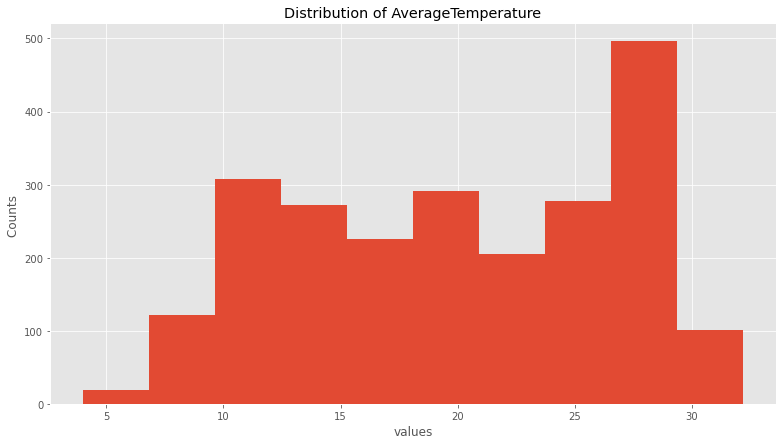

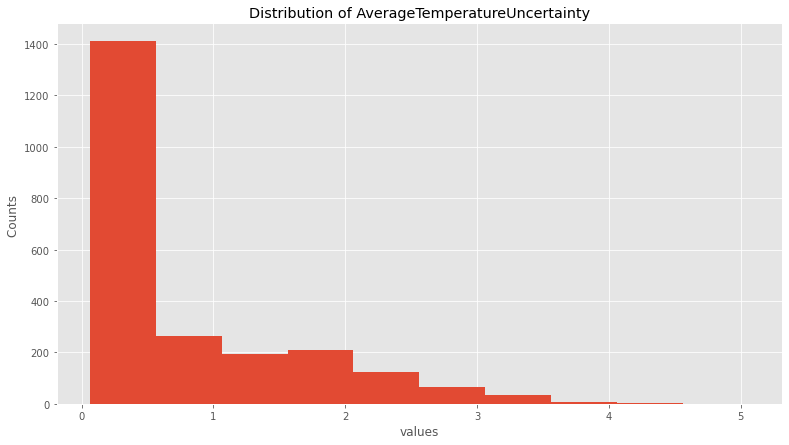

In [29]:
p.distribution(df)

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,2316.0,19.980095,6.870505,4.023,13.74825,20.3055,26.686,32.166
AverageTemperatureUncertainty,2316.0,0.812963,0.810973,0.061,0.26200,0.3990,1.240,5.063


In [31]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1820-01-01,7.169,3.676,San Antonio,United States,29.74N,97.85W
1820-02-01,11.448,2.964,San Antonio,United States,29.74N,97.85W
1820-03-01,15.003,2.413,San Antonio,United States,29.74N,97.85W
1820-04-01,21.022,2.136,San Antonio,United States,29.74N,97.85W
1820-05-01,23.938,1.923,San Antonio,United States,29.74N,97.85W


In [32]:
#let's see opur data

<AxesSubplot:xlabel='dt'>

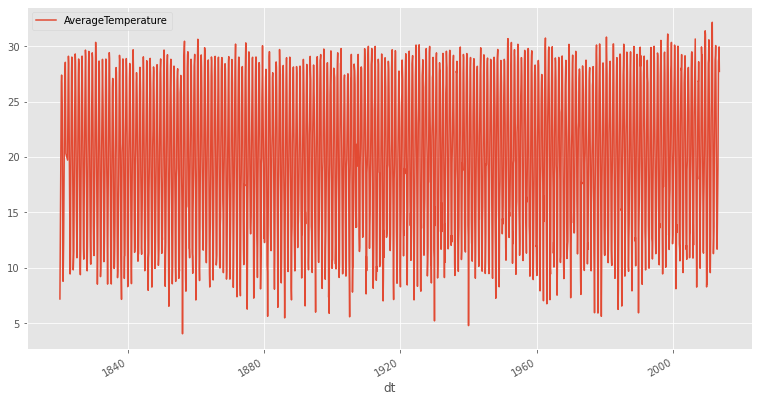

In [33]:
df.groupby(['dt']).AverageTemperature.mean().reset_index().plot(x='dt', y = 'AverageTemperature')

<AxesSubplot:xlabel='dt'>

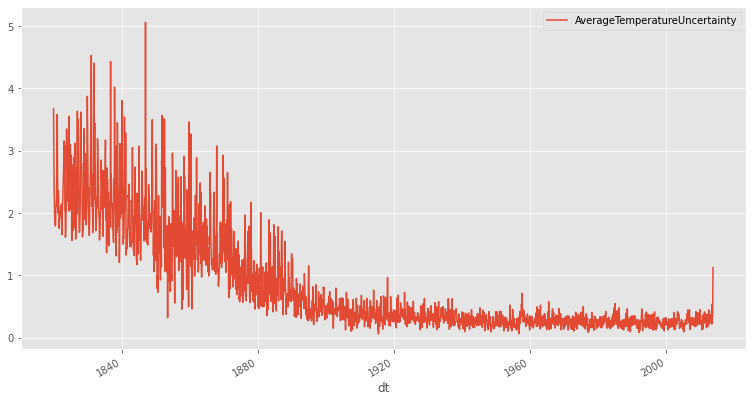

In [34]:
df.groupby(['dt']).AverageTemperatureUncertainty.mean().reset_index().plot(x='dt', y = 'AverageTemperatureUncertainty')

**it looks like after 1903 the AverageTemperatureUncertainty got lower so we can cut our df from there**

In [35]:
#narrow the years
df['1900':].describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,1365.0,20.181842,6.885411,4.762,13.842,20.588,26.817,32.166
AverageTemperatureUncertainty,1365.0,0.298857,0.117634,0.061,0.217,0.279,0.357,1.123


In [36]:
df1 = df[['AverageTemperature','AverageTemperatureUncertainty']]['1900':]

<AxesSubplot:xlabel='dt'>

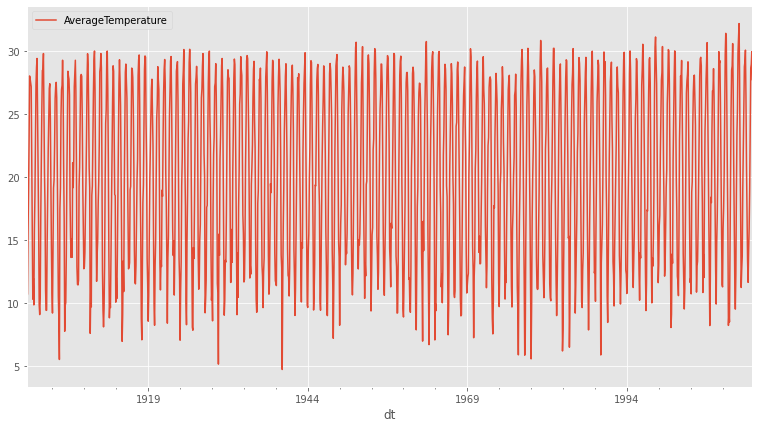

In [37]:
 df1.groupby(['dt']).AverageTemperature.mean().reset_index().plot(x='dt', y = 'AverageTemperature')

<AxesSubplot:xlabel='dt'>

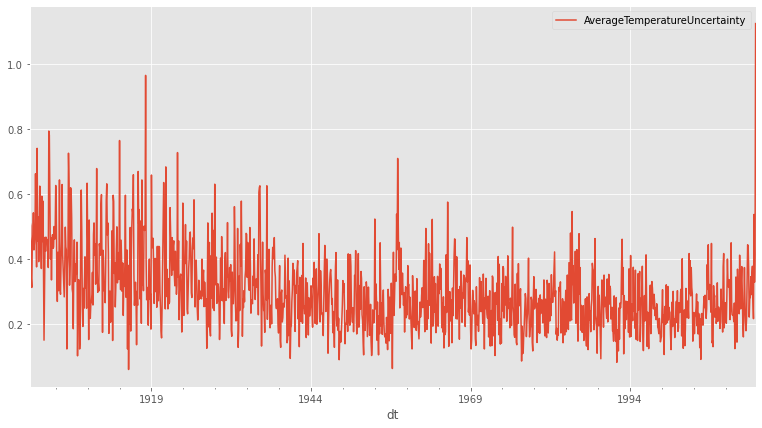

In [38]:
 df1.groupby(['dt']).AverageTemperatureUncertainty.mean().reset_index().plot(x='dt', y = 'AverageTemperatureUncertainty')

### Split

In [39]:
#resample my data by month
df_r = df1.resample('M').mean()

In [41]:
df_r.head()

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1900-01-31,10.559,0.513
1900-02-28,10.741,0.502
1900-03-31,15.604,0.341
1900-04-30,18.834,0.313
1900-05-31,22.884,0.453


In [42]:
# set train size to be 50% of total 
train_size = int(len(df_r) * 0.5)
train_size

682

In [43]:
# set validate size to be 30% of total 
validate_size = int(len(df_r) * 0.3)
validate_size

409

In [44]:
# set test size to be number of rows remaining. 
test_size = int(len(df_r) - train_size - validate_size)
test_size

274

In [45]:
# validate will go from 682 to 1091
validate_end_index = train_size + validate_size
validate_end_index

1091

In [46]:
# train will go from 0 to 681
train = df_r[:train_size]
# validate will go from 682 to 1090
validate = df_r[train_size:validate_end_index]
# test will include 1091 to the end
test = df_r[validate_end_index:]

**checking the split**

In [47]:
# is len of train + validate + test == lenght of entire dataframe. 
print(len(train) + len(validate) + len(test) == len(df_r))

True


In [48]:
#checking train and validate
pd.concat([train.tail(1), validate.head(1)])

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1956-10-31,22.662,0.064
1956-11-30,14.333,0.291


In [49]:
#checking validate and test
pd.concat([validate.tail(1), test.head(1)])

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1990-11-30,17.167,0.317
1990-12-31,10.581,0.309


In [50]:
#check if test and df_r ends same
pd.concat([test.tail(1), df_r.tail(1)])

,AverageTemperature,AverageTemperatureUncertainty
dt,,
2013-09-30,27.727,1.123
2013-09-30,27.727,1.123


In [51]:
train.shape, validate.shape, test.shape

((682, 2), (409, 2), (274, 2))

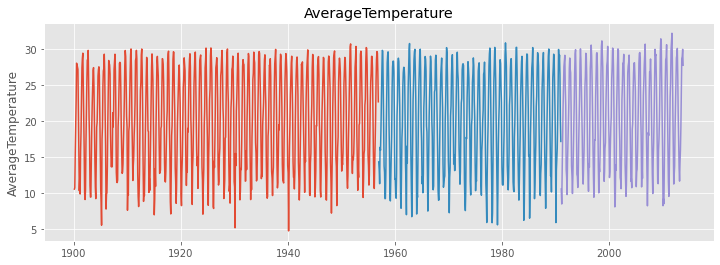

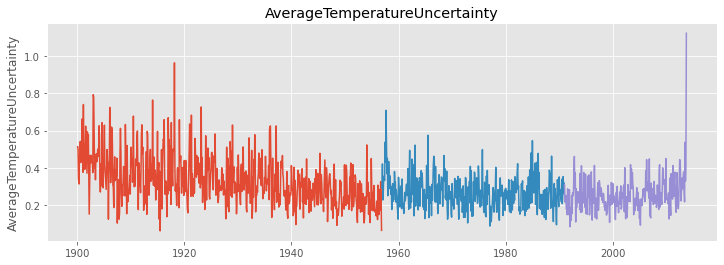

In [52]:
#how the data is split
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [53]:
df_r.index.min(), df_r.index.max()

(Timestamp('1900-01-31 00:00:00', freq='M'),
 Timestamp('2013-09-30 00:00:00', freq='M'))

**Takeaways**
- I decided to drop 9 missing values because have nulls
- set date to index
- AverageTemperature is per month
- remample my data by month 
- just use 2 columns

# Explore

In [54]:
train.head()

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1900-01-31,10.559,0.513
1900-02-28,10.741,0.502
1900-03-31,15.604,0.341
1900-04-30,18.834,0.313
1900-05-31,22.884,0.453


In [55]:
#target 
y = train.AverageTemperature

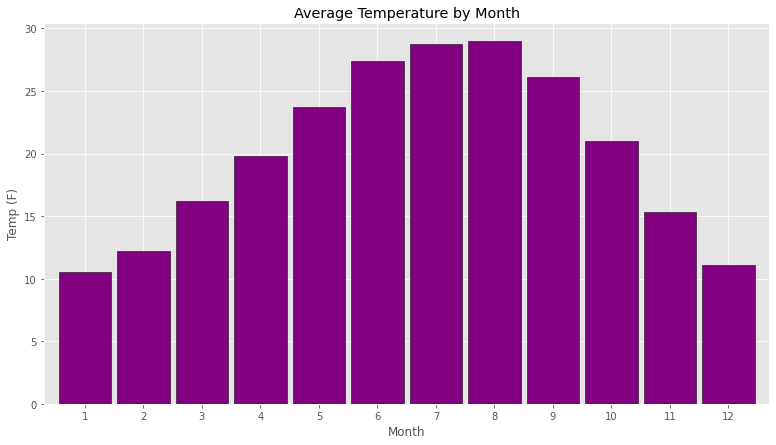

In [56]:
#plot average by month
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black', color = 'purple')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month', ylabel='Temp (F)')
plt.show()

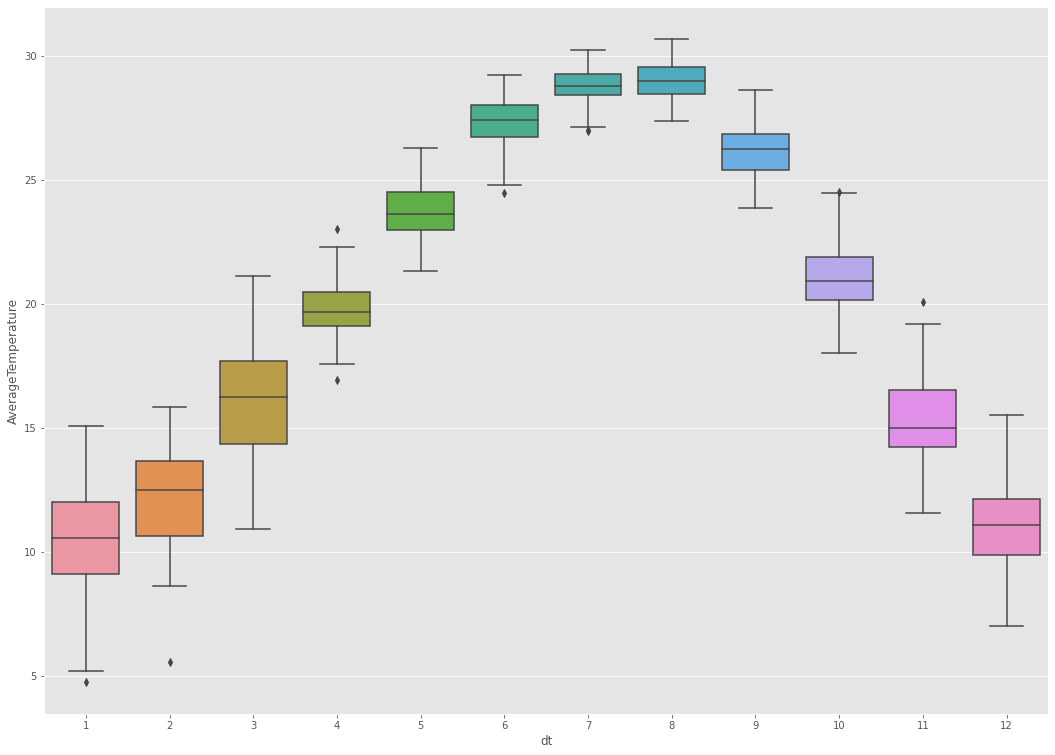

In [57]:
# boxplot each moth
plt.figure(figsize=(18, 13))
sns.boxplot(x = train.AverageTemperature.index.month, y = 'AverageTemperature', data = train)
plt.show()

**takeaways**
- August is the warmest month
- second warmest month : July, 
- third warmest month : June
- September is warmer than May (surprise)
- January is the coldest month followed by december

In [58]:
#lets check if the temperature change by day of the week

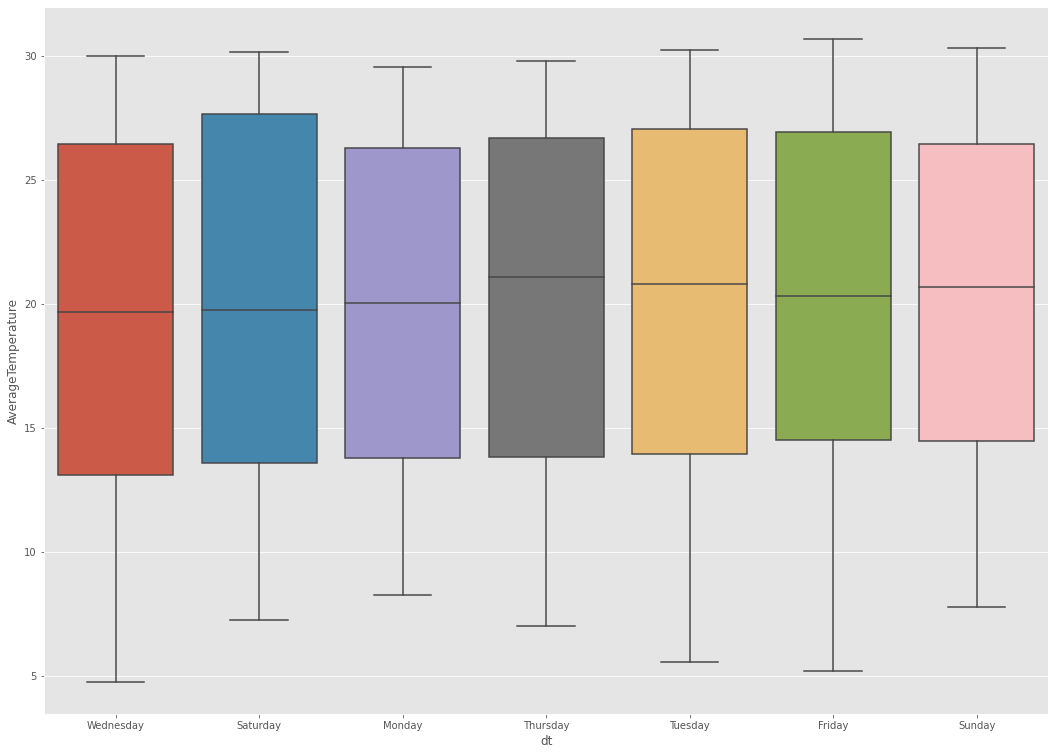

In [60]:
# boxplot each week day
plt.figure(figsize=(18, 13))
sns.boxplot(x = y.index.day_name(), y = 'AverageTemperature', data = train)
plt.show()

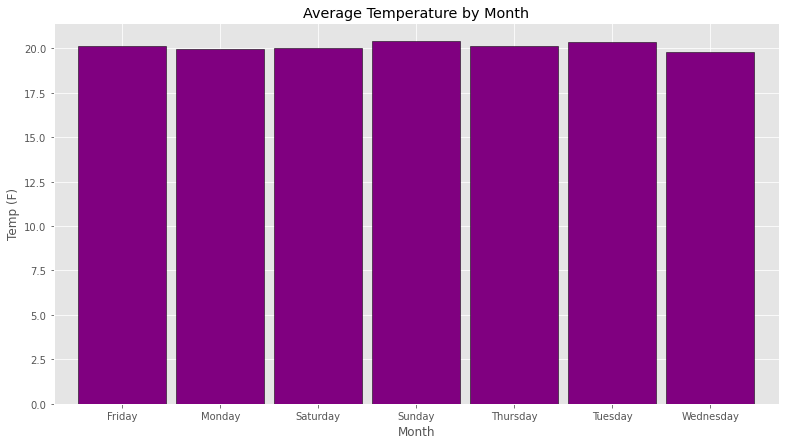

In [62]:
#plot average by week day
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black', color = 'purple')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month', ylabel='Temp (F)')
plt.show()

In [63]:
y.groupby(y.index.day_name()).mean().sort_values()

dt
Wednesday    19.781838
Monday       19.971804
Saturday     20.010286
Thursday     20.142361
Friday       20.155660
Tuesday      20.370155
Sunday       20.389392
Name: AverageTemperature, dtype: float64

**takeaways**
- Wednesday is the average coldest day of the week
- Sunday is the average warmest day
- there is so low the difference

### Resample 

Text(0, 0.5, 'Temp')

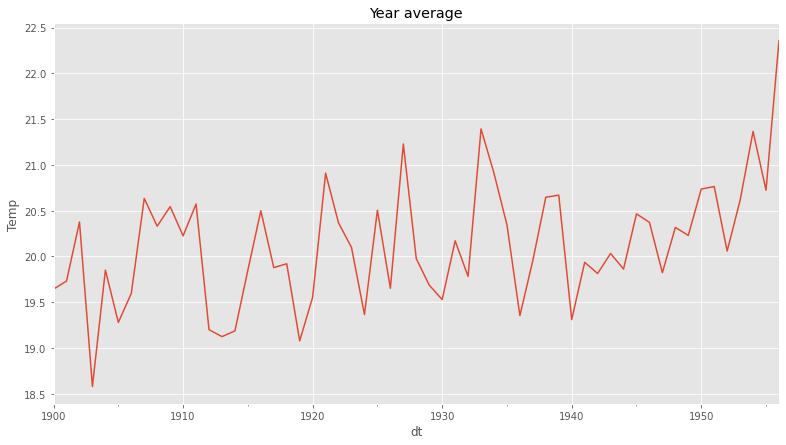

In [64]:
y.resample('Y').mean().plot(title='Year average')
plt.ylabel("Temp")

Text(0, 0.5, 'Temp')

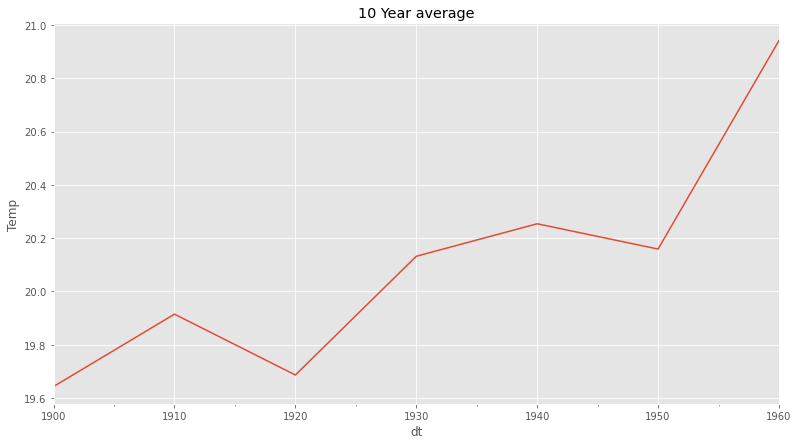

In [65]:
y.resample('10Y').mean().plot(title='10 Year average')
plt.ylabel("Temp")

Text(0, 0.5, 'Temp')

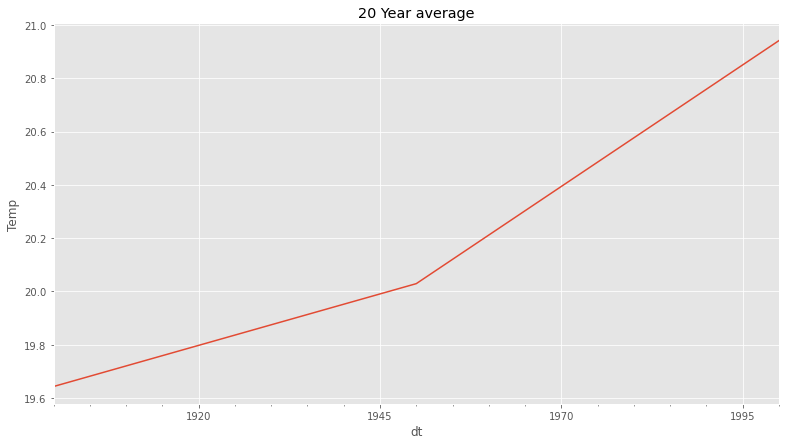

In [66]:
y.resample('50Y').mean().plot(title='20 Year average')
plt.ylabel("Temp")

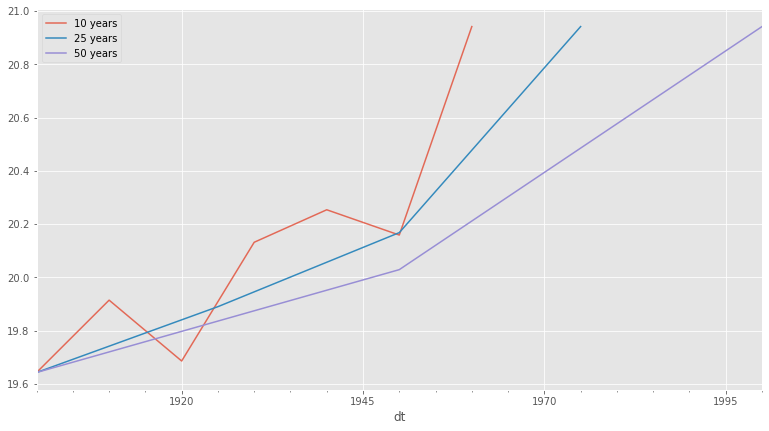

In [67]:
#lets see all 
y.resample('10Y').mean().plot(alpha=.8, label='10 years')
y.resample('25Y').mean().plot(label='25 years')
y.resample('50Y').mean().plot(label='50 years')
plt.legend()

**takeaways**
- there is no doubt the temperature is increasing over the years.
- we can see around  1950's temperature is increasing more

<AxesSubplot:title={'center':'Average year-to-year change in temperature'}, xlabel='dt'>

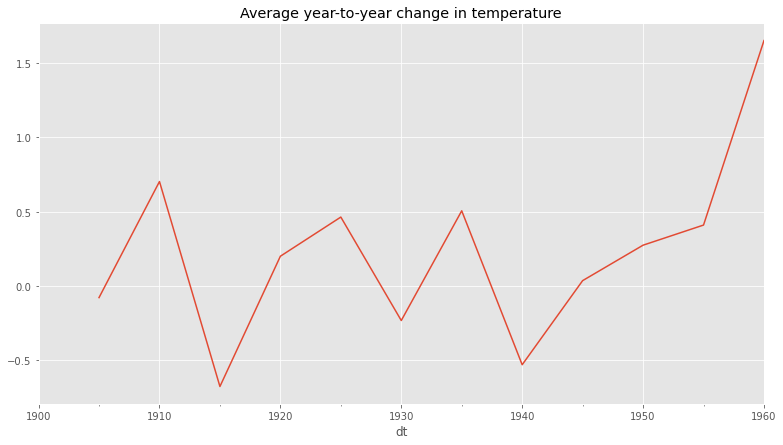

In [68]:
y.resample('5Y').mean().diff().plot(title='Average year-to-year change in temperature')

**takeaways**
- we can see since 1955, Temperature was increasing more

### Seasonal Plot

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='dt'>

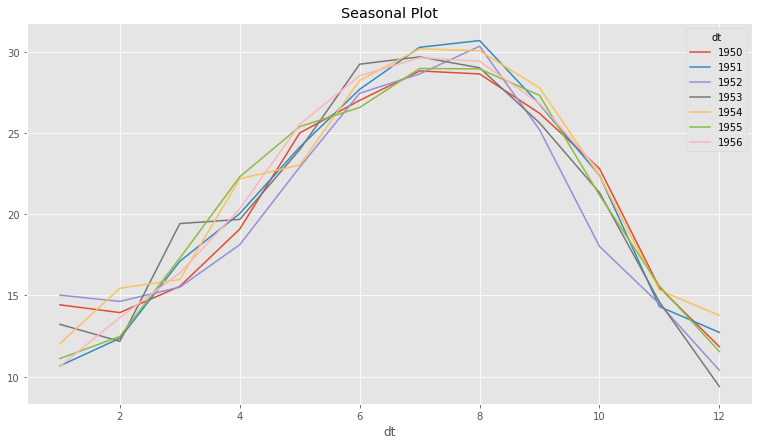

In [69]:
# check the 1950 - 1956 years by month
y['1950':].groupby([y['1950':].index.year, y['1950':].index.month]).mean().unstack(0).plot(title='Seasonal Plot')

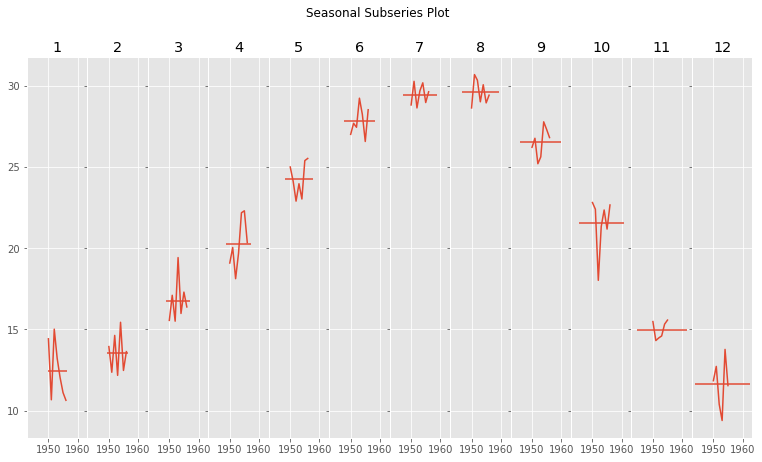

In [71]:
#check every month since 1950- 1960
table = y['1950':].groupby([y['1950':].index.year, y['1950':].index.month]).mean().unstack()


fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='dt', ylabel='dt'>

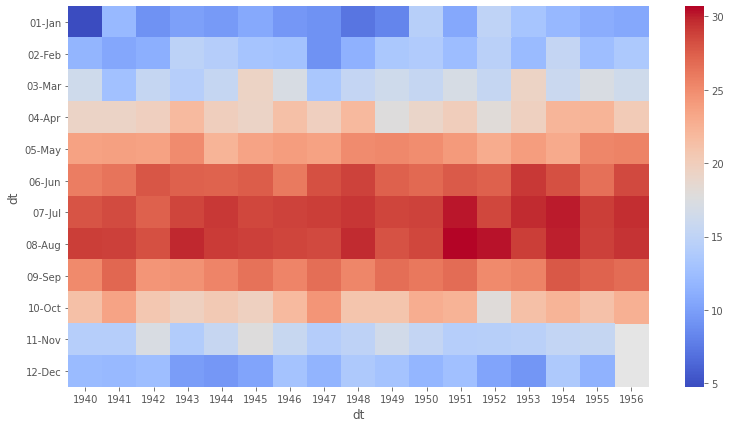

In [73]:
table = y['1940':].groupby([y['1940':].index.strftime('%Y'), y['1940':].index.strftime('%m-%b')]).mean().unstack(0)
sns.heatmap(table, cmap='coolwarm')

**takeaways**
- we can see clearly the hottest months
- jan 1940 was the coldest month 1940-1956

### Lag Plot

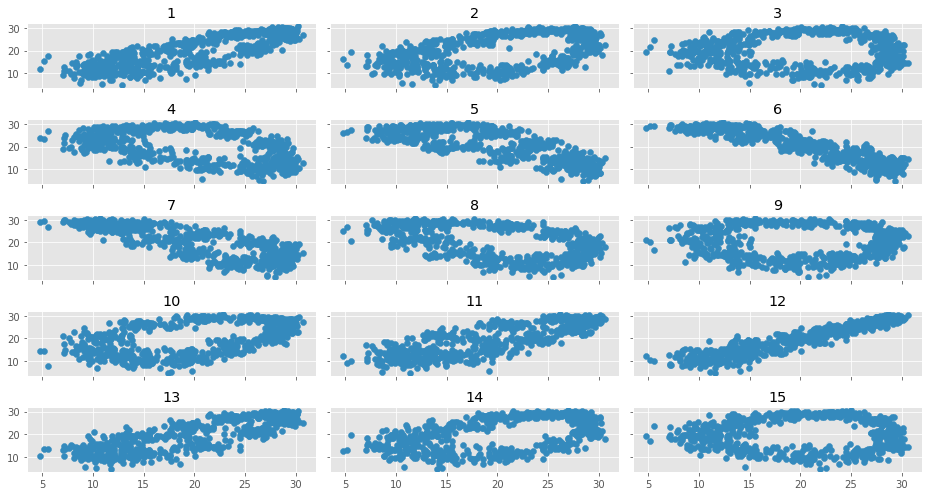

In [75]:
fig, axs = plt.subplots(5, 3, sharex=True, sharey=True)

for ax, lag in zip(axs.ravel(), range(1, 16)):
    pd.plotting.lag_plot(train.AverageTemperature, lag=lag, ax=ax)
    ax.set(title=lag, xlabel='', ylabel='')
    
fig.tight_layout()

** takeaways**
- every12 months looks like have more correlation

**Seasonal Decomposition**

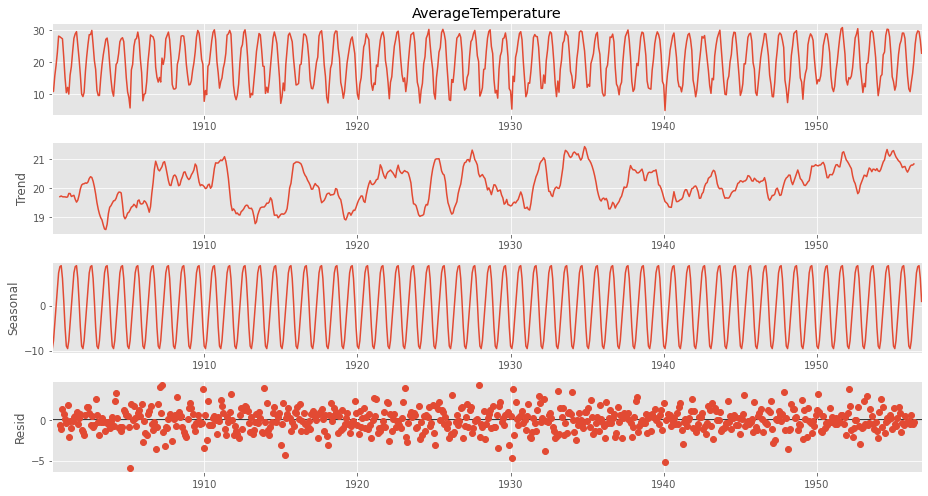

In [76]:

sm.tsa.seasonal_decompose(train.AverageTemperature.resample('M').mean()).plot()
None

**Autocorrelation Plot**

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

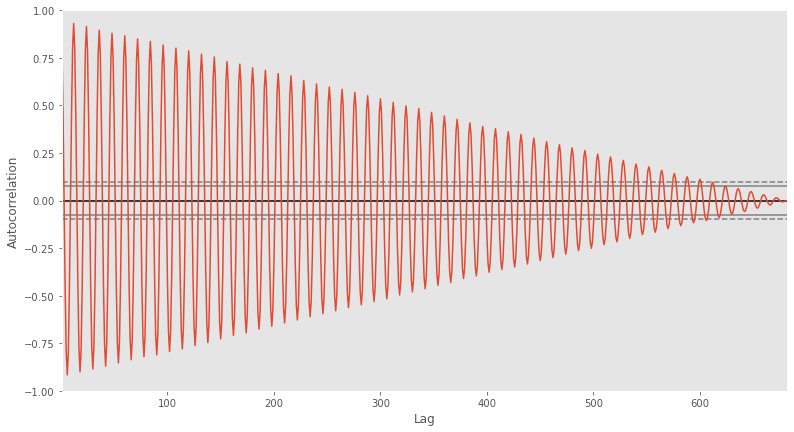

In [77]:
pd.plotting.autocorrelation_plot(y.resample('M').mean())

# Model

In [78]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [79]:
train.head()

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1900-01-31,10.559,0.513
1900-02-28,10.741,0.502
1900-03-31,15.604,0.341
1900-04-30,18.834,0.313
1900-05-31,22.884,0.453



### Forecast

Forecasting is another word for predicting time series data.

- Last Observed Value: The future will look like the now
- Simple Average: The future will look, on average, like history.
- Moving Average: The future will look, on average, like recent history.
- Holt's Linear Trend
Previous Cycle

### Last observed value


**- Make Predictions**

In [80]:
# take the last item of avgtemp and assign to variable
temp = round(train['AverageTemperature'][-1:][0], 2)
temp

22.66

In [81]:
# take the last AverageTemperatureUncertainty and assign to variable
temp_unc = round(train['AverageTemperatureUncertainty'][-1:][0],2)
temp_unc

0.06

In [82]:
yhat_df = pd.DataFrame({'AverageTemperature': [temp], 
                        'AverageTemperatureUncertainty': [temp_unc]}, 
                      index = validate.index)

yhat_df.head()

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1956-11-30,22.66,0.06
1956-12-31,22.66,0.06
1957-01-31,22.66,0.06
1957-02-28,22.66,0.06
1957-03-31,22.66,0.06


In [83]:
yhat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,409.0,22.66,1.067119e-13,22.66,22.66,22.66,22.66,22.66
AverageTemperatureUncertainty,409.0,0.06,3.404222e-16,0.06,0.06,0.06,0.06,0.06


### Plot Actual vs. Predicted Values

AverageTemperature -- RMSE: 8


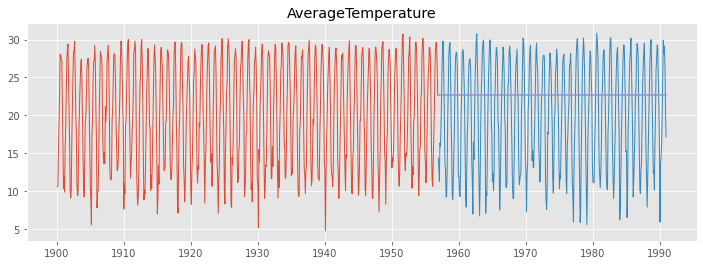

AverageTemperatureUncertainty -- RMSE: 0


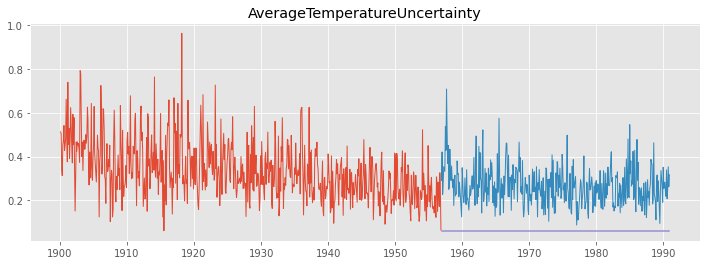

In [84]:

for col in train.columns:
    model.plot_and_eval(train, validate , yhat_df, col)

### Evaluate

In [85]:
for col in train.columns:
    eval_df = model.append_eval_df(validate, yhat_df, eval_df, model_type = 'last_observed_value', 
                             target_var = col)


    


In [86]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,8.0
1,last_observed_value,AverageTemperatureUncertainty,0.0


## Simple Average

In [87]:
# compute simple average
temp = round(train['AverageTemperature'].mean(), 2)
temp

20.12

In [88]:
temp_unc = round(train['AverageTemperatureUncertainty'].mean(),2)
temp_unc

0.34

In [89]:
#apply predictions
yhat_df = model.make_predictions(yhat_df, validate,  temp, temp_unc)

In [90]:
yhat_df.head()

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1956-11-30,20.12,0.34
1956-12-31,20.12,0.34
1957-01-31,20.12,0.34
1957-02-28,20.12,0.34
1957-03-31,20.12,0.34


In [91]:
train.tail(15)

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1955-08-31,28.945,0.161
1955-09-30,27.314,0.171
1955-10-31,21.178,0.142
1955-11-30,15.578,0.221
1955-12-31,11.546,0.196
1956-01-31,10.641,0.122
1956-02-29,13.637,0.307
1956-03-31,16.385,0.276
1956-04-30,20.346,0.149


In [92]:
validate.head()

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1956-11-30,14.333,0.291
1956-12-31,13.279,0.421
1957-01-31,11.308,0.227
1957-02-28,16.357,0.276
1957-03-31,15.945,0.354


### Plot Actual vs. Predicted Values¶

AverageTemperature -- RMSE: 7


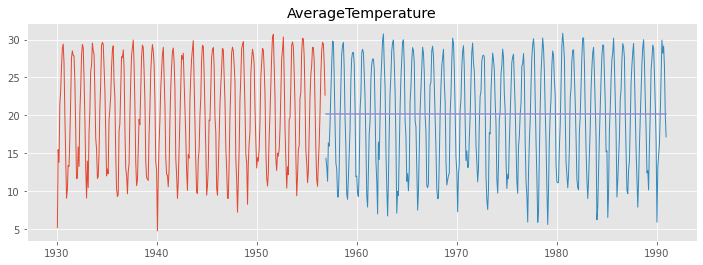

AverageTemperatureUncertainty -- RMSE: 0


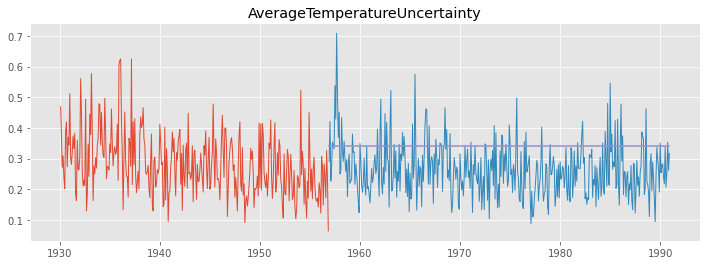

In [93]:
for col in train.columns:
    model.plot_and_eval(train['1930':], validate , yhat_df, col)

In [94]:
for col in train.columns:
    eval_df = model.append_eval_df(validate, yhat_df, eval_df, model_type = 'simple_avg', 
                             target_var = col)

In [95]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,8.0
1,last_observed_value,AverageTemperatureUncertainty,0.0
2,simple_avg,AverageTemperature,7.0
3,simple_avg,AverageTemperatureUncertainty,0.0


## Moving Average

In [96]:
# take 12 months  rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
temp = round(train['AverageTemperature'].rolling(12).mean()[-1], 2)
temp_unc = round(train['AverageTemperatureUncertainty'].rolling(12).mean()[-1], 2)
print(temp, temp_unc)

20.89 0.22


In [97]:
# make predictions
yhat_df = model.make_predictions(yhat_df, validate,  temp, temp_unc)
yhat_df.head()

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1956-11-30,20.89,0.22
1956-12-31,20.89,0.22
1957-01-31,20.89,0.22
1957-02-28,20.89,0.22
1957-03-31,20.89,0.22


AverageTemperature -- RMSE: 7


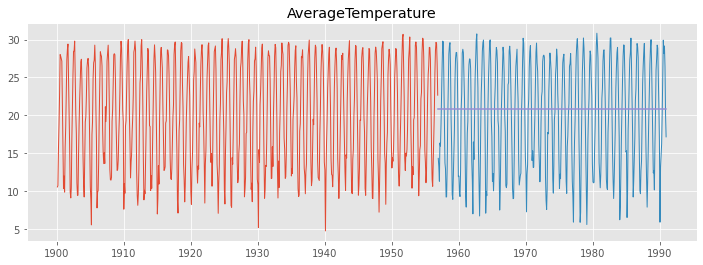

AverageTemperatureUncertainty -- RMSE: 0


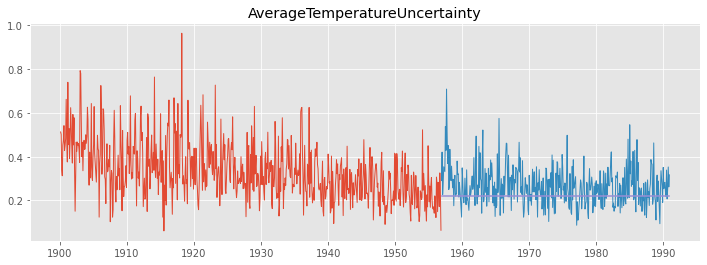

In [98]:
for col in train.columns:
    model.plot_and_eval(train, validate , yhat_df, col)

In [99]:
# def modeling (temp, temp_unc, yhat_df, train, validate, model_name, eval_df):
#     #prediction
#     yhat_df = make_predictions(yhat_df, validate,  temp, temp_unc)
#     #plot actual vs predicted values
#     for col in train.columns:
#         plot_and_eval(train, validate , yhat_df, col)
#     #evaluate
#     for col in train.columns:
#         eval_df = append_eval_df(validate, yhat_df, eval_df, model_type = model_name, 
#                                  target_var = col)
#     return eval_df

AverageTemperature -- RMSE: 7


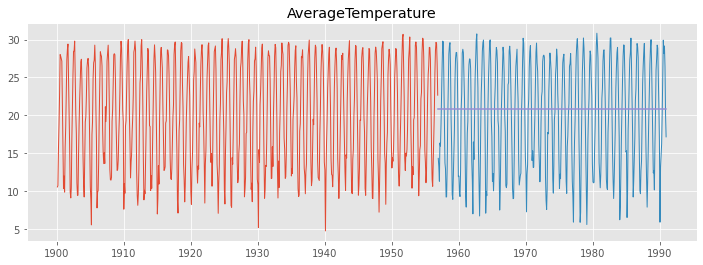

AverageTemperatureUncertainty -- RMSE: 0


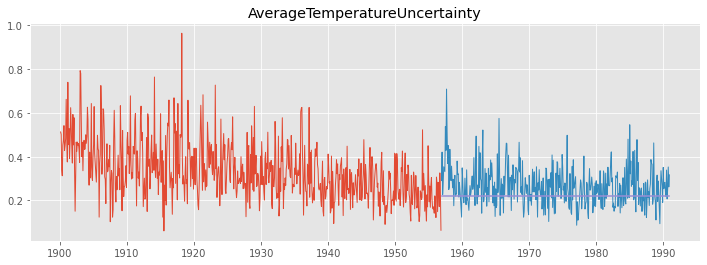

In [100]:
eval_df =model.modeling( temp, temp_unc, yhat_df, train, validate, '12m_moving_avg', eval_df)

In [101]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,8.0
1,last_observed_value,AverageTemperatureUncertainty,0.0
2,simple_avg,AverageTemperature,7.0
3,simple_avg,AverageTemperatureUncertainty,0.0
4,12m_moving_avg,AverageTemperature,7.0
5,12m_moving_avg,AverageTemperatureUncertainty,0.0


## Predict Based on Previous Cycle

In [104]:
#re-split our data
train = df_r['1900':'1955']
validate = df_r['1956':'1999']
test = df_r['2000':]

print(train.shape)
print(validate.shape)
print(test.shape)



(672, 2)
(528, 2)
(165, 2)


In [106]:
#checking the split

In [111]:
df_r.head(1)

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1900-01-31,10.559,0.513


In [112]:
train.head(1)

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1900-01-31,10.559,0.513


In [113]:
train.tail(1)

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1955-12-31,11.546,0.196


In [114]:
validate.head(1)

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1956-01-31,10.641,0.122


In [115]:
validate.tail(1)

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1999-12-31,12.159,0.316


In [116]:
test.head(1)

,AverageTemperature,AverageTemperatureUncertainty
dt,,
2000-01-31,12.973,0.213


In [117]:
test.tail(1)

,AverageTemperature,AverageTemperatureUncertainty
dt,,
2013-09-30,27.727,1.123


In [118]:
df_r.tail(1)

,AverageTemperature,AverageTemperatureUncertainty
dt,,
2013-09-30,27.727,1.123


In [120]:
#def yhat_df
yhat_df =train['1912':] + train.diff(12).mean()

In [122]:
yhat_df.head()

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1912-01-31,8.158641,0.626189
1912-02-29,9.611641,0.469189
1912-03-31,12.990641,0.506189
1912-04-30,19.442641,0.413189
1912-05-31,24.276641,0.167189


In [124]:

# set yhat_df to index of validate
yhat_df.index = validate.index

In [126]:
yhat_df.head()

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1956-01-31,8.158641,0.626189
1956-02-29,9.611641,0.469189
1956-03-31,12.990641,0.506189
1956-04-30,19.442641,0.413189
1956-05-31,24.276641,0.167189


AverageTemperature -- RMSE: 2


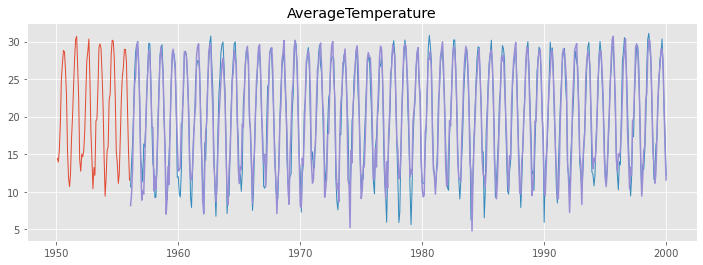

AverageTemperatureUncertainty -- RMSE: 0


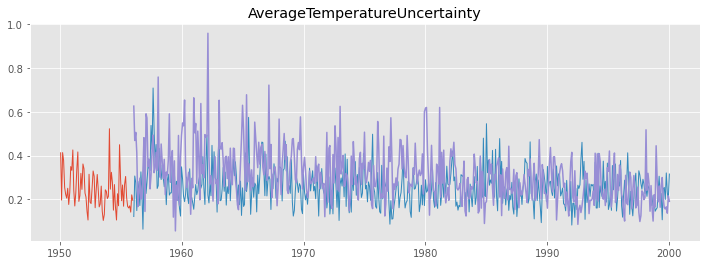

In [127]:
for col in train.columns:
    model.plot_and_eval(train['1950':], validate , yhat_df, col)

In [128]:
for col in train.columns:
    eval_df = model.append_eval_df(validate, yhat_df, eval_df, model_type = "previous_year", 
                            target_var = col)

In [129]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,8.0
1,last_observed_value,AverageTemperatureUncertainty,0.0
2,simple_avg,AverageTemperature,7.0
3,simple_avg,AverageTemperatureUncertainty,0.0
4,12m_moving_avg,AverageTemperature,7.0
5,12m_moving_avg,AverageTemperatureUncertainty,0.0
6,previous_year,AverageTemperature,2.0
7,previous_year,AverageTemperatureUncertainty,0.0


# Conclusion

In [130]:
#get min 
temp_min_rmse = eval_df.groupby('target_var')['rmse'].min()[0]
temp_min_rmse

2.0

In [131]:
#get min
tempunc_min_rmse = eval_df.groupby('target_var')['rmse'].min()[1]
tempunc_min_rmse

0.0

In [132]:
# find which model that is
eval_df[((eval_df.rmse == temp_min_rmse) | 
         (eval_df.rmse == tempunc_min_rmse))]

,model_type,target_var,rmse
1,last_observed_value,AverageTemperatureUncertainty,0.0
3,simple_avg,AverageTemperatureUncertainty,0.0
5,12m_moving_avg,AverageTemperatureUncertainty,0.0
6,previous_year,AverageTemperature,2.0
7,previous_year,AverageTemperatureUncertainty,0.0


**takeaways**
- AverageTemperature the best model is previous_year


**Let's test it out on our out-of-sample data**

In [134]:
yhat_df = validate['1986-04-01':'1999'] + train.diff(12).mean()

In [135]:
yhat_df

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1986-04-30,21.992641,0.177189
1986-05-31,23.474641,0.253189
1986-06-30,27.260641,0.250189
1986-07-31,29.489641,0.170189
1986-08-31,29.050641,0.237189
...,...,...
1999-08-31,30.365641,0.195189
1999-09-30,26.763641,0.316189
1999-10-31,20.842641,0.224189


In [136]:
yhat_df.index = test.index

In [137]:
yhat_df

,AverageTemperature,AverageTemperatureUncertainty
dt,,
2000-01-31,21.992641,0.177189
2000-02-29,23.474641,0.253189
2000-03-31,27.260641,0.250189
2000-04-30,29.489641,0.170189
2000-05-31,29.050641,0.237189
...,...,...
2013-05-31,30.365641,0.195189
2013-06-30,26.763641,0.316189
2013-07-31,20.842641,0.224189


In [138]:
def final_plot(target_var):
    plt.figure(figsize=(16,8))
    plt.plot(train['1950':][target_var], label='train')
    plt.plot(validate[target_var], label='validate')
    plt.plot(test[target_var], label='test')
    plt.plot(yhat_df[target_var], alpha=.5)
    plt.title(target_var)
    rmse = sqrt(mean_squared_error(test['AverageTemperature'], yhat_df['AverageTemperature']))
    print('Test -- RMSE: {:.3f}'.format(rmse))
    plt.show()

In [139]:
rmse_temp = sqrt(mean_squared_error(test['AverageTemperature'], 
                                       yhat_df['AverageTemperature']))

rmse_temp_unc = sqrt(mean_squared_error(test['AverageTemperatureUncertainty'], 
                                       yhat_df['AverageTemperatureUncertainty']))

In [140]:

print('rmse-Average Temperatrure: ', rmse_temp)
print('rmse-AverageTemperatureUncertainty: ', rmse_temp_unc)

rmse-Average Temperatrure:  9.596734991389093
rmse-AverageTemperatureUncertainty:  0.12296157866514115


In [141]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,8.0
1,last_observed_value,AverageTemperatureUncertainty,0.0
2,simple_avg,AverageTemperature,7.0
3,simple_avg,AverageTemperatureUncertainty,0.0
4,12m_moving_avg,AverageTemperature,7.0
5,12m_moving_avg,AverageTemperatureUncertainty,0.0
6,previous_year,AverageTemperature,2.0
7,previous_year,AverageTemperatureUncertainty,0.0


Test -- RMSE: 9.597


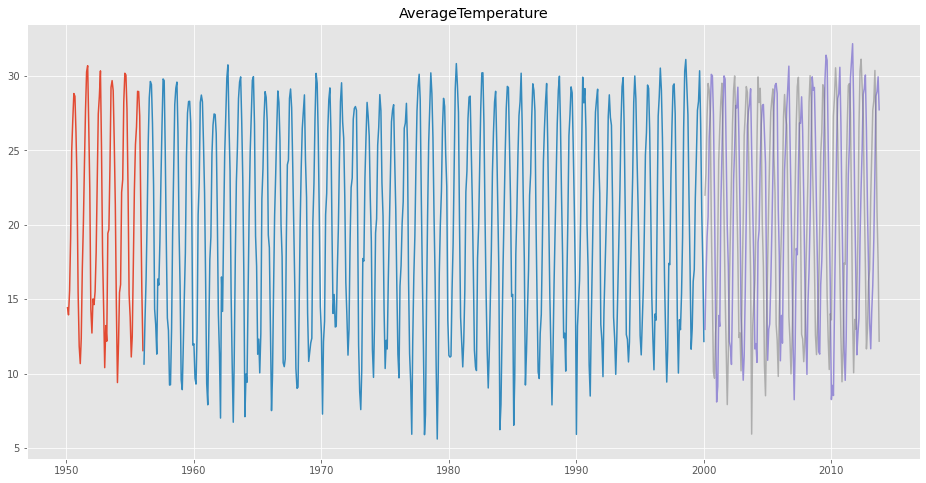

Test -- RMSE: 9.597


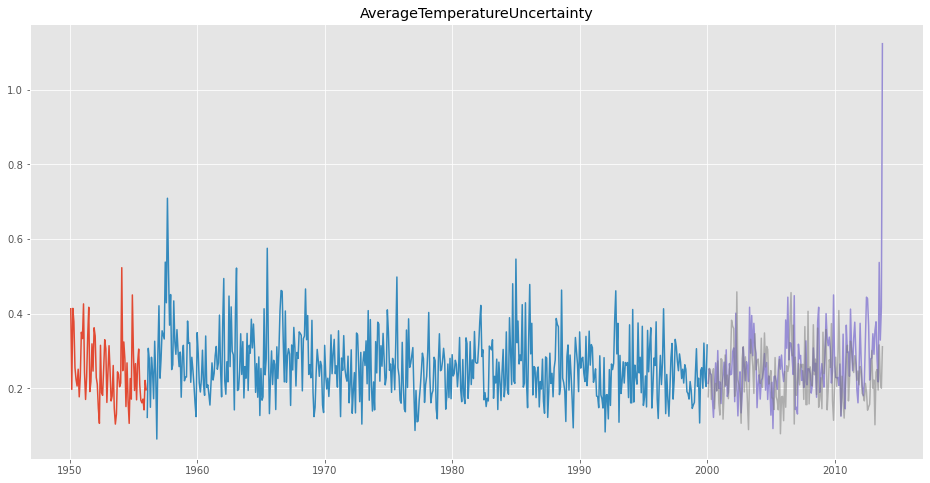

In [142]:
for col in train.columns:
    final_plot(col)

**Conclusion**
1. my best model is using previous years RMSE = 2
2. on test RMSE = 9.59 

with more time I will  use only the last 20 years to see it makes a difference and I wil try to use Holt's Linear Trend